PCA example
========


In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

We generate 4D-sample data. 

We make two classes of 4D data. We use data for 5 sports cars and 5 avarage
cars. The variables for each car is horsepower, displacement[L] , weight [lbs],
and Co2 emmision [g/mi]

Class 1 sample data (5x4 matrix)

In [3]:
normalcars = np.array([[211,1.984,3875,314],[128,1.4,3125,250.38],
                       [175,2.5,3875,264.27],[132,1.798,3125,246.19],
                       [170,1.798,3375,174.55]])

Class 2 sample data (5x4 matrix)

In [4]:
sportscars = np.array([[568,6,4500,309.22],[553,4.4,4750,602.28],
                       [650,6.2,3875,280.2],[621,5.98,5500,646.63],
                       [572,3.8,3875,264.87]])

Lables for variables and objects

In [5]:
variables = np.array(['Horsepower','Displacements','Weight','Co2emmision'])
names = np.array(['Audi_A4','Hyndai_Elantra','Subaru_Legacy','Toyota_Corolla','Volkswagen_Golf','Aston_Martin','BMW_M5','Chevrolet_Corvette','Mercedes_s65amg','Prosche_911turbo'])

Since PCA is unsupervised we do not know that the data consists of 2 classes. 
Therefore we combine normal- and sportscars to the matrix allcars(10x4)

In [6]:
allcars = np.concatenate((normalcars, sportscars), axis=0)

Since the variables are in different units we standardize the data with mean=0
and variance = 1.

In [7]:
allcarsstd = StandardScaler().fit_transform(allcars)

We calculate the covariance matrix of the standardized data, then find eigenvalues and eigenvectors, and sort them in decending order.

In [8]:
covmat=np.cov(allcarsstd.T)
eigvals, eigvecs = np.linalg.eig(covmat)
eigpairs = [(np.abs(eigvals[i]), eigvecs[:,i]) for i in range(len(eigvals))]
eigpairs.sort(key=lambda x: x[0], reverse=True)

We now want to see how much of the variance can be explained with each PC. We generate a plot of cummulative explaiend variance for PC component i.

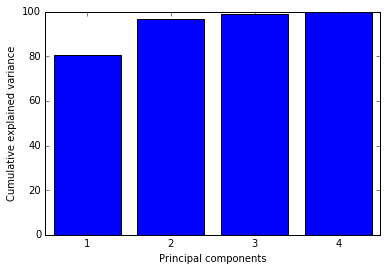

In [9]:
sumeigvals = sum(eigvals)
sortedeigvals = sorted(eigvals, reverse=True)
explvar=np.zeros(len(eigvals))

for idx, i in enumerate(sortedeigvals):
    explvar[idx] = (i/sumeigvals)*100
    
cumvarexp = np.cumsum(explvar)

from matplotlib import pyplot as plt
plt.close('all')
xaxis =np.arange(0.5,len(cumvarexp)+0.5)
fig1= plt.figure()
ax1 = fig1.add_subplot(111)
ax1.bar(xaxis, cumvarexp, width=0.8, align='center')
ax1.set_xticks(xaxis)
ax1.set_xticklabels([1,2,3,4])
ax1.set_ylabel('Cumulative explained variance')
ax1.set_xlabel('Principal components')

In the plot we see that with 2 principal components we are able to explain more than 95% of the variance.

We now extract the loadings matrix P from the sorted list of eigenvectors. We can now use P to transfrom our original mean centered data X to the scores matrix Z.

In [10]:
P = np.hstack((eigpairs[0][1].reshape(4,1), eigpairs[1][1].reshape(4,1)))
Z = np.dot(allcarsstd,P)

We make a plot for the scores, color coding each car based on wether it was a sports car or normal car.

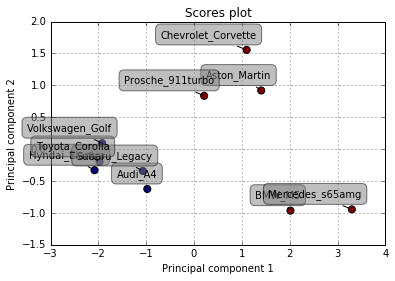

In [18]:
carclass=np.array([0,0,0,0,0,1,1,1,1,1])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.grid()
ax2.set_title('Scores plot')
ax2.scatter(Z[:,0],Z[:,1],c=carclass,s=50)
ax2.set_xlabel('Principal component 1')
ax2.set_ylabel('Principal component 2')
for label, x, y in zip(names, Z[:, 0], Z[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'grey', alpha = 0.5),
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

From this plot we can see how the car classes are grouped on either side of x=0. We also note that cars that sit together are in fact similar cars. For the full picture we also plot the loadings to see how much each variable contributes to each of the principal components.

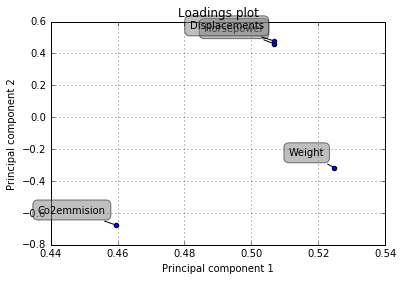

In [20]:
fig3= plt.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(P[:,0],P[:,1])
ax3.grid()
ax3.set_title('Loadings plot')
ax3.set_xlabel('Principal component 1')
ax3.set_ylabel('Principal component 2')
for label, x, y in zip(variables, P[:, 0], P[:, 1]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'grey', alpha = 0.5),
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

In the loadings plot we can see the variables displacement and horsepower are closely related. For PC 1 we see that all variables contribute by a factor of between 0.46 to 0.52, where weight is the biggest contributer. The Mercedes on the fra right of the scores plot then has large values for all the variables. For PC 2 both wight and Co2 emmision have a negative contribution while horsepower and displacement have a positive contribution. If we inspect the scores plot can see the corvette with a large y-value then has alot of displacement and horsepower, and little weight and Co2 emmision.

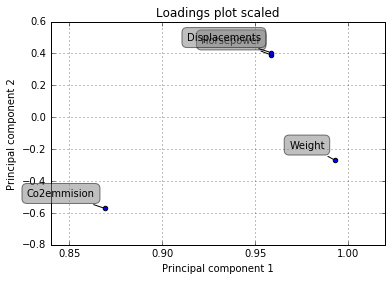

In [23]:
correspeigvals = np.array([eigpairs[0][0],eigpairs[1][0]])
sqrtev = np.sqrt(correspeigvals)
loadings = np.array([P[:,0]*sqrtev[0],P[:,1]*sqrtev[1]])
fig4= plt.figure()
ax4 = fig4.add_subplot(111)
ax4.scatter(loadings[0,:],loadings[1,:])
ax4.grid()
ax4.set_title('Loadings plot scaled')
ax4.set_xlabel('Principal component 1')
ax4.set_ylabel('Principal component 2')
for label, x, y in zip(variables, loadings[0, :], loadings[1, :]):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (-10, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'grey', alpha = 0.5),
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))